# CS 439 - Introduction to Data Science
### Spring 2025

## Final Project: Heart Attack Risk Prediction Model

<div class="alert alert-block alert-info">
<b>Name</b>: Jake Rudnick<br>
<b>Partner</b>: Divya Raizada<br> 
<b>NetIDs</b>: jpr200 and dr1102<br>
<b>Recitation #</b>: 4<br>
<b>IMPORTANT</b>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: JR

## Import Libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Part 1: Preparing Data

In [101]:
data = pd.read_csv("Medicaldataset.csv")
display(data)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


### Interpretation

This dataset is a collection of health-related information for 8763 patients, encompassing demographic factors, various health indicators, lifestyle habits, geographical information, and an assessment of their heart attack risk. It can be used to make various conclusions, some relating to what variables are strongly associated with heart attach risk, and others to predict a patient's risk on having a heart attack based on their characteristics.
The presence of both controllable risk factors and non-modifiable risk factors makes this dataset valuable for a comprehensive understanding of heart health.

In [102]:
data.head()
data['Result'] = data['Result'].map({'positive': 1, 'negative': 0})
nan_values_per_column = data.isna().sum()
print(nan_values_per_column)

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


## Part 2: Visualizing the Data

In [ ]:
#Age vs Heart Attack Result
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='Age', hue='Result', data=data, palette='pastel', dodge=False
)
plt.title("Age by Heart Attack Result")
plt.xlabel("Heart Attack Result (0 = Negative, 1 = Positive)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

#Gender vs Heart Attack Result
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Result', data=data, palette='Set2')
plt.title("Gender by Heart Attack Result")
plt.xlabel("Gender (0 = Female, 1 = Male)")  # adjust if needed
plt.ylabel("Count")
plt.legend(title="Result")
plt.tight_layout()
plt.show()

#Heart Rate vs. Heart Attack Result
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='Heart rate', hue='Result', data=data, palette='pastel', dodge=False
)
plt.title("Heart Rate by Heart Attack Result")
plt.xlabel("Heart Attack Result (0 = Negative, 1 = Positive)")
plt.ylabel("Heart Rate (bpm)")
plt.tight_layout()
plt.show()

#Systolic Blood Pressure vs Result
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='Systolic blood pressure', hue='Result', data=data, palette='pastel', dodge=False
)
plt.title("Systolic BP by Heart Attack Result")
plt.xlabel("Heart Attack Result")
plt.ylabel("Systolic Blood Pressure (mm Hg)")
plt.tight_layout()
plt.show()

#Diastolic Blood Pressure vs Heart Attack Result
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='Diastolic blood pressure', hue='Result',data=data, palette='pastel', dodge=False
)
plt.title("Diastolic BP by Heart Attack Result")
plt.xlabel("Heart Attack Result (0 = Negative, 1 = Positive)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")
plt.tight_layout()
plt.show()

#Blood Sugar vs Heart Attack Result
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='Blood sugar', hue='Result', data=data, palette='pastel', dodge=False
)
plt.title("Blood Sugar by Heart Attack Result")
plt.xlabel("Heart Attack Result (0 = Negative, 1 = Positive)")
plt.ylabel("Blood Sugar (mg/dL)")
plt.tight_layout()
plt.show()

#CK-MB vs Heart Attack Result
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='CK-MB', hue='Result', data=data, palette='pastel', dodge=False
)
plt.title("CK-MB Levels by Heart Attack Result")
plt.xlabel("Heart Attack Result")
plt.ylabel("CK-MB (ng/mL)")
plt.tight_layout()
plt.show()

#Troponin
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Result', y='Troponin', hue='Result', data=data, palette='pastel', dodge=False
)
plt.title("Troponin Levels by Heart Attack Result")
plt.xlabel("Heart Attack Result")
plt.ylabel("Troponin (ng/mL)")
plt.tight_layout()
plt.show()


## Part 3: Building the Model

In [104]:
#Separate the independent variables (features) and dependent variable (target)
X = data.drop(columns=['Result'])
y = data['Result']

Training Accuracy: 0.8133
Testing Accuracy: 0.7992


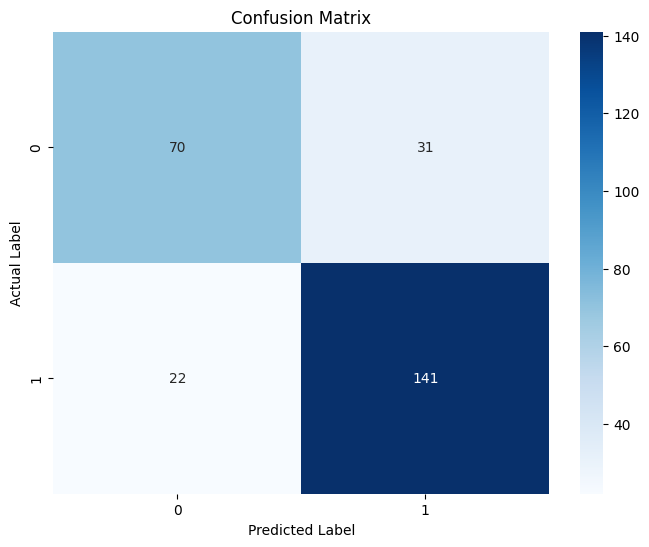


Confusion Matrix:
[[ 70  31]
 [ 22 141]]


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


cm = confusion_matrix(y_test, y_test_pred)

class_labels = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)